# **_Investigate Hotel Business using Data Visualization_**

By: Bintang Sirius

---

**Table of Content:**
- Introduction
- Load Dataset
- Data Exploration
- Data Cleansing
- Data Visualization

# **Introduction**

**1. Background** <br>
Sangat penting bagi suatu perusahaan untuk selalu menganalisa performa bisnisnya. Pada kesempatan kali ini, akan didalami bisnis dalam bidang perhotelan. Fokus yang dituju adalah untuk mengetahui bagaimana perilaku pelanggan dalam melakukan pemesanan hotel, dan hubungannya terhadap tingkat pembatalan pemesanan hotel. Hasil dari insight yang ditemukan akan disajikan dalam bentuk visualisasi data agar lebih mudah dipahami dan bersifat lebih persuasif.<br>

**2. Business Questions** <br>
- Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?
- Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
- Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?<br>

**3. Objective** <br>
Membuat visualisasi berbasis data sebagai insight bagi bisnis hotel

# **Load Dataset**

In [1]:
# 1. Import Package
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2. Import Dataset
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
107500,City Hotel,0,10,2019,May,11,12,1,0,2,...,0,No Deposit,14.0,NaN,0,Personal,40.00,0,0,Check-Out
100362,City Hotel,0,66,2018,December,44,24,1,2,2,...,0,No Deposit,7.0,NaN,0,Personal,184.52,0,1,Check-Out
67491,City Hotel,1,143,2019,July,18,4,0,2,2,...,0,Non Refund,56.0,NaN,0,Personal,120.00,0,0,Canceled


# **Data Exploration**
Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya.

## 1. Melihat deskripsi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari <i>dataset</i> diatas, didapat kesimpulan sebagai berikut:
1. Dataset ini memeiliki **119390** <i>records</i> dan **29** <i>feature</i>
2. Tipe data pada <i>dataset</i> ini yaitu **object, float64,** dan **int64**
3. Terdapat **33261 data duplikat** pada <i>dataset</i> ini

## 2. Memeriksa _value_ dari setiap _feature_

In [5]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

Dari <i>dataset</i> diatas, didapat kesimpulan sebagai berikut:
1. Terdapat _value_ **'Undefined'** pada _feature_ `meal`, `market_segment`, `distribution_channel`. Oleh karena itu, akan dilakukan analisis lebih lanjut apakah _value_ tersebut perlu di _handling_ atau tidak
2. _Feature_ **`company`** dan **`agent`** memiliki _value_ float, kemungkinan merujuk pada **id atau _value_ yang telah di encoding**
3. _Feature_ yang menunjukkan jumlah tamu (`adults`, `children`, dan `babies`) akan dilakukan analisis lebih lanjut untuk mengatahui apakah terdapat data yang anomali

## 3. Memeriksa _null value_

### 1. Memeriksa _missing value_

In [6]:
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


Dari hasil _coding_ diatas, didapat kesimpulan sebagai berikut:
1. Terdapat _missing/null value_ pada _feature_ `company`, `city`, `children`, dan `agent`
2. Oleh karena adanya poin 1 diatas, maka akan dilakukan imputasi nilai pada _missing value_

### 2. Memeriksa _duplicated data_

In [7]:
df.duplicated().sum()

33261

Dari hasil _coding_ diatas, didapat kesimpulan bahwa data duplikat akan dihapus dan menyisakan satu _unique value_

## 4. _Numerical Feature_

### 1. _Statistical Descriptive_

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


Didapat bahwa _feature_ `adr`, **_Averange Daily Rate_** (_room revenue_/_number of room sold_) terdapat _value_ negatif. Hal itu merupakan anomali dan perlu di _drop_.

### 2. Memeriksa distribusi _feature_ numerikal

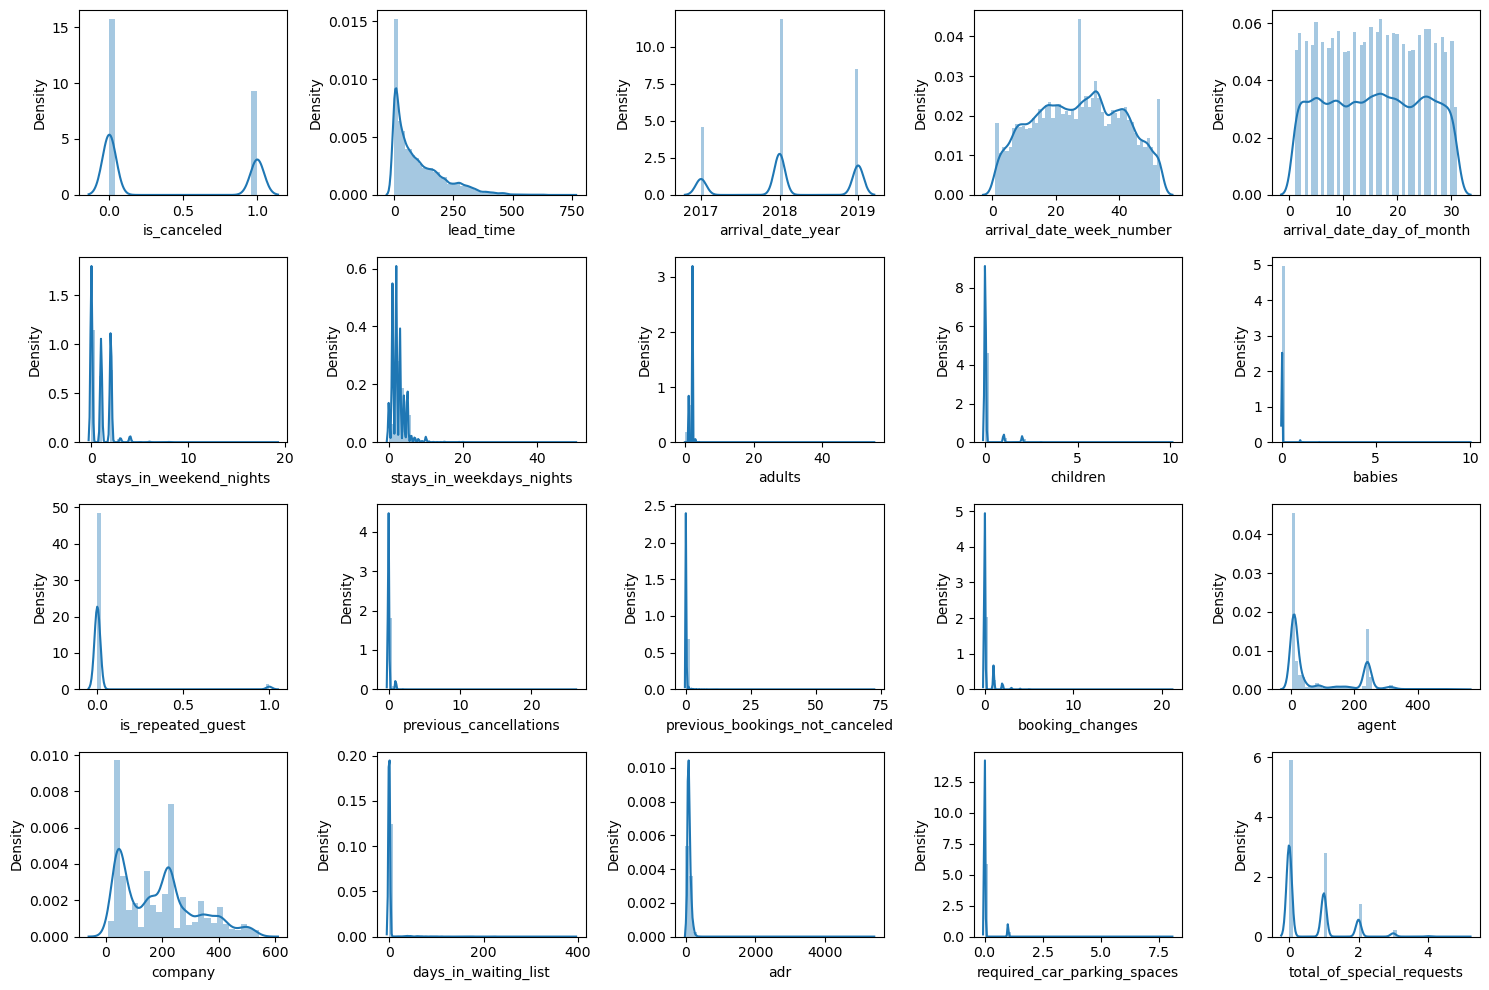

In [9]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Dari grafik-grafik diatas didapat bahwa secara keseluruhan, _feature_ cenderung _positively skewed_. Selain itu, `arrival_date_week_number` dan `arrival_date_day_of_month` memiliki distribusi  yang cenderung normal

### 3. Memeriksa _outlier feature_ numerikal

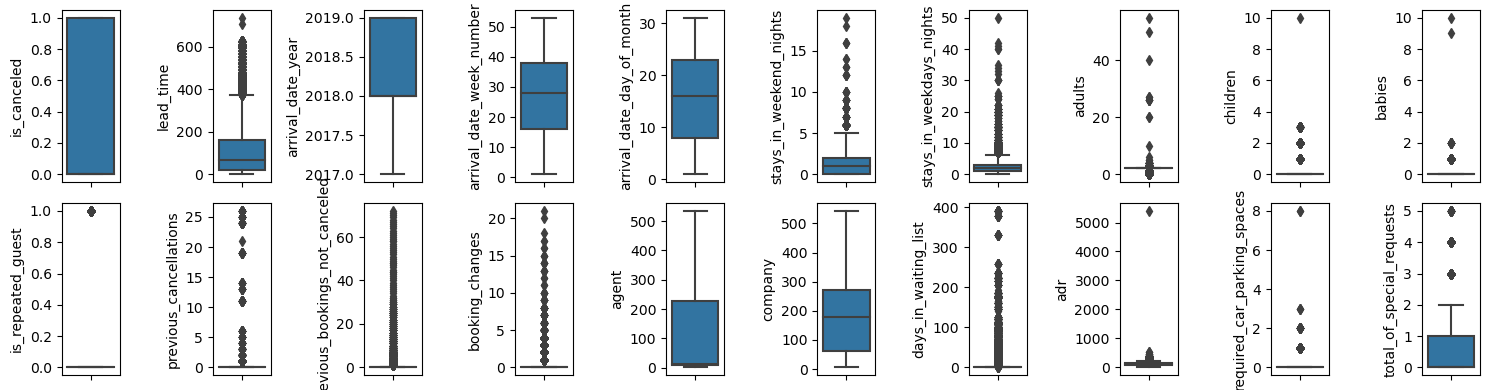

In [10]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Dari grafik-grafik diatas didapat bahwa:
1. Secara keseluruhan, fitur mayoritas memiliki _outlier_
2. Terlihat _extreme value_ pada _feature_ `adr`, `required_car_parking_spaces`, `children`, dan `babies`
3. Oleh karena itu, _handling outlier_ akan dilakukan menghilangkan nilai ekstrim saja, agar tidak mengurangi _insight_ yang dihasilkan

Mengecek data anomali tamu = 0 atau tedapat kamar yang dibooking namun tidak ada tamu yang menginap

In [11]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

Dari _coding_ diatas, terdapat **180 kamar** yang tidak memiliki tamu, yang nantinya akan di _drop_

## 5. _Categorical Feature_

### 1. _Statistical Descriptive_

In [12]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


### 2. Memeriksa distribusi _feature_

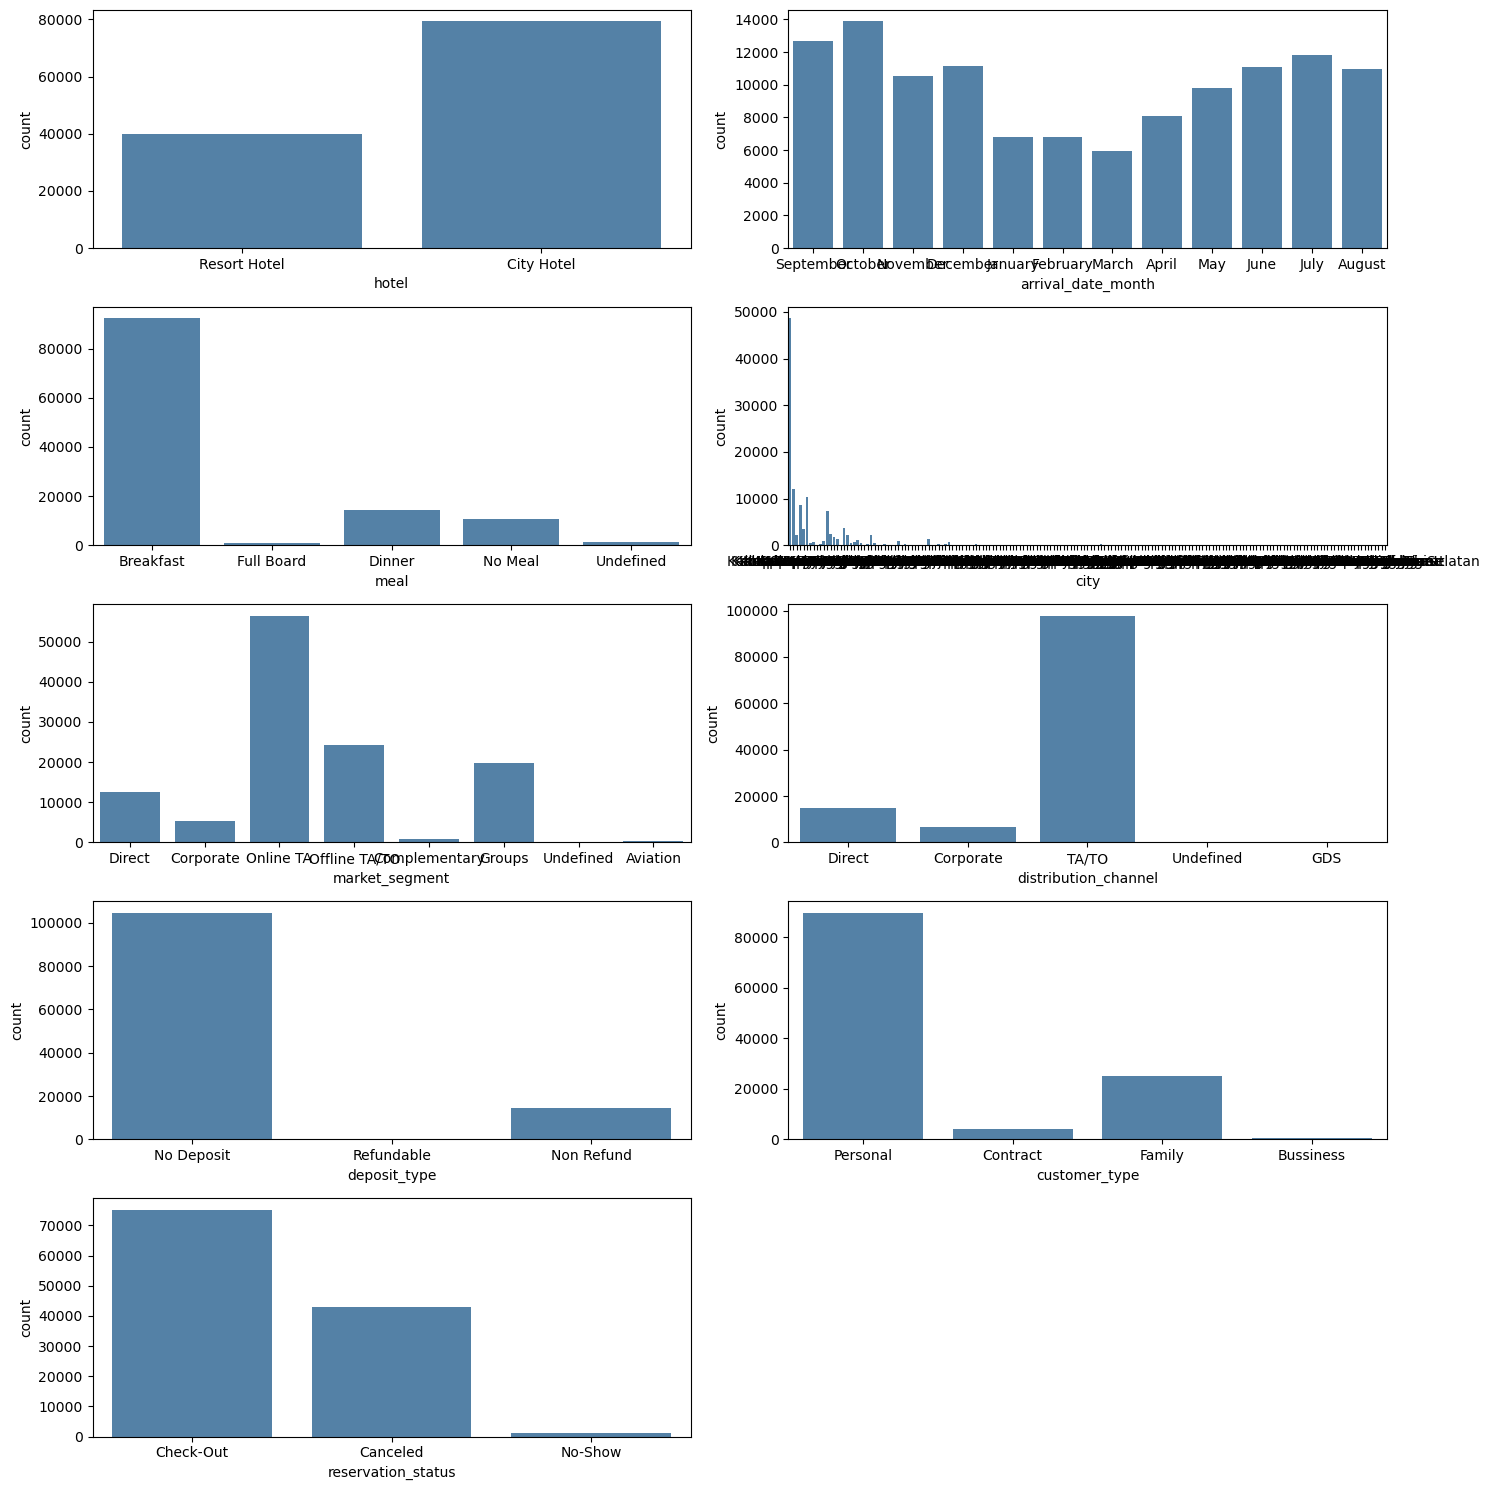

In [13]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

# **Data Cleansing**

In [14]:
df_clean = df.copy()

## 1. _Handling Null Values_

Terdapat empat _feature_ yang terdapat _null values_, yaitu `company`, `city`, `children`, dan `agent`
Akan dilakukan tindakan sebagai berikut:
1. _Null value_ pada _feature_ `company`**diisi dengan 0**, menandakan tamu tidak berasal dari company
2.  _Null value_ pada _feature_ `agent` **diisi dengan 0**, menandakan tamu melakukan reservasi mandiri atau tidak melalui agen
3.  _Null value_ pada _feature_ `children` **diisi dengan 0**, menandakan tamu tidak membawa anak-anak
4.  _Null value_ pada _feature_ `city` - **diisi dengan 'Undefined'**, dikarenakan kota nya tidak diketahui secara pasti.

In [15]:
# Poin 1, 2, dan 3
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# Poin 4
df_clean['city'].fillna('Undefined', inplace=True)

In [16]:
df_clean.isna().sum().sum()

0

## 2. _Handling Inconsistent and Extream Values_
Pada tahap ini, akan di _handle_ data-data yang tidak konsisten, serta akan di _handle_ nilai-nilai ekstrim, dengan detil sebagai berikut:
- _Feature_ **`meal`** dapat dikategorikan menjadi 2 yaitu 'With Meal' dan 'No Meal', dengan keterangan:
    1. **'With Meal'** = Breakfast, Full Board, Dinner
    2. **'No Meal'** = No Meal, Undefined
<br>
<br>
- _Feature_ **`Children`** sebaiknya menggunakan tipe data integer

In [17]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [18]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

In [19]:
df_clean['children'] = df_clean['children'].astype('int64')

- Menghapus nilai ekstrim pada data

In [20]:
# Feature `adr`
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# Feature `required_car_parking_spaces`
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# Feature 'babies'
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# Feature `children`
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# Tidak ada tamu
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

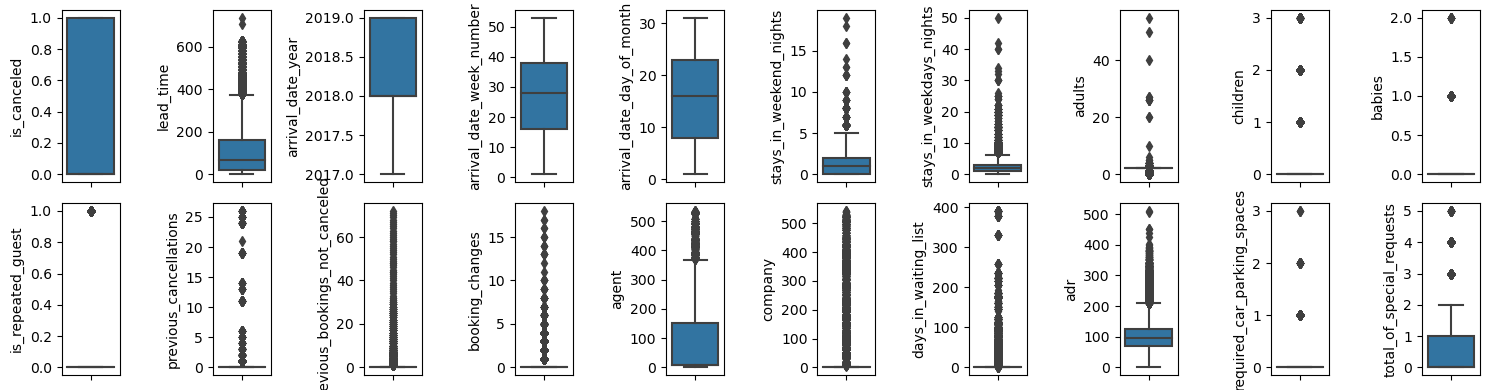

In [21]:
# Memeriksa outlier fitur numerikal
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

## 3. _Handling Duplicated Data_
Pada tahapan ini, akan dilakukan _handling_ terhadap data-data yang terduplikat

In [22]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
17923,Resort Hotel,0,4,2018,May,13,23,0,1,1,...,0,No Deposit,0.0,0.0,0,Personal,58.0,0,0,Check-Out
50089,City Hotel,1,10,2018,June,17,23,1,1,2,...,0,No Deposit,9.0,0.0,0,Personal,146.0,0,1,Canceled


In [23]:
## drop data duplikat
# df_clean.drop_duplicates(keep='first', inplace=True)

Berdasarkan analisa lebih lanjut data duplikat tidak akan di hapus. Hal tersebut dikarenakan:
1. Jumlah yang banyak dan penghapusan data duplikat mempengaruhi nilai statistik dalam analisis
2. Dalam dataset tidak terdapat unik_id/unik_booking_id dan tanggal, data duplikat bisa saja memiliki informasi penting. Mungkin terdapat pemesanan yang sama terjadi pada waktu yang berbeda.

In [24]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


 Didapat bahwa jumlah data setelah dilakukan _cleaning_ yaitu sebanyak 119.203 dari 119.390 data

# **Data Visualization**

## A. _Monthly Hotel Booking Analysis Based on Hotel Type_
Analisis ini difokuskan untuk melihat tren dari pemesanan hotel untuk tiap jenis hotel. 

In [25]:
# Membaca dataset yang telah dibersihkan sebelumnya
df_c = df_clean.copy()

### 1. _Ratio Total Booking_

In [26]:
# summary persentase total booking
# group fitur hotel dan agregasi menggunakan count
hotel_type = df_c.groupby('hotel')[['hotel']].count()
#-------------------------------------------------------------------
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


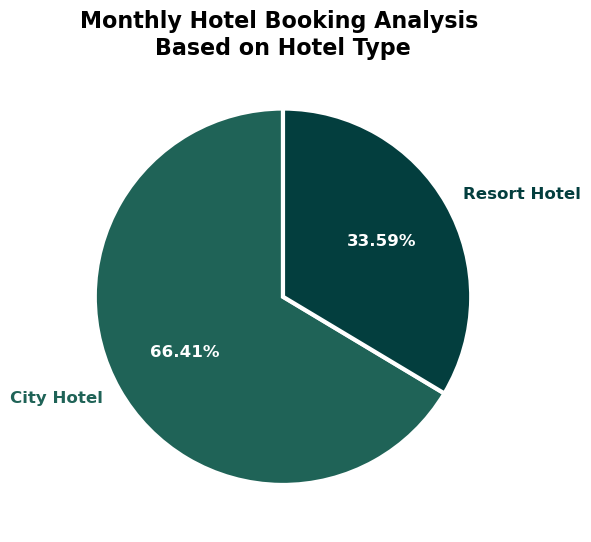

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f6357', '#033e3e'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Monthly Hotel Booking Analysis \nBased on Hotel Type', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

Dari grafik diatas, didapatkan bahwa:
1. City Hotel **66.41% lebih banyak dipesan** apabila dibandingkan dengan Resort Hotel.
    - Diduga bahwa mayoritas pelanggan yang memesan Hotel City ini merupakan **pelancong yang memiliki aktivitas utama disekitar tempat mereka menginap**, bukan tujuan utama mereka untuk melakukan aktivitas di hotel.
    - City hotel biasanya terletak di pusat kota atau daerah perkotaan, dekat dengan tempat-tempat wisata dan bisnis. Mereka biasanya dirancang untuk memberikan kenyamanan dan kemudahan akses ke fasilitas dan aktivitas di kota, seperti restoran, pusat perbelanjaan, dan tempat wisata.
2. Sementara 33.59% lainnya merupakan pelanggan Resort Hotel.
    - Pelanggan yang memesan hotel ini diduga memang memiliki tujuan untuk berlibur dan bersantai di tempat ini karena Resort hotel biasanya terletak di tempat-tempat yang indah seperti tepi pantai, pegunungan, atau daerah pedesaan yang tenang dan terdapat fasilitas yang lengkap.

### 2. _Ratio Total Booking per Month_

#### a. Membuat _summary_ dari aggregasi _total booking_ perbulan

In [28]:
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


Dapat dilihat bahwa mayoritas jumlah masing-masing bulan dapat dataset memiliki jumlah pada kolon nunique 2 kecuali untuk bulan **October** dan **Septemper**. Hal ini pastinya dapat berpengaruh terhadap nilai kalkulasi dan hasilnya bisa jadi kurang valid. Untuk mengatasi hal tersebut maka  dilakukan normalisasi dengan menghitung **rata-ratanya** (total/nunique).

#### b. _Normalization_

In [29]:
# menghitung rata-rata dari count dibagi nunique
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


#### c. _Sort Month Value_

In [30]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#---------------------------------------------------------------------------------------------
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


#### d. _Visualization_

Text(10, 4800, 'Holiday Season II')

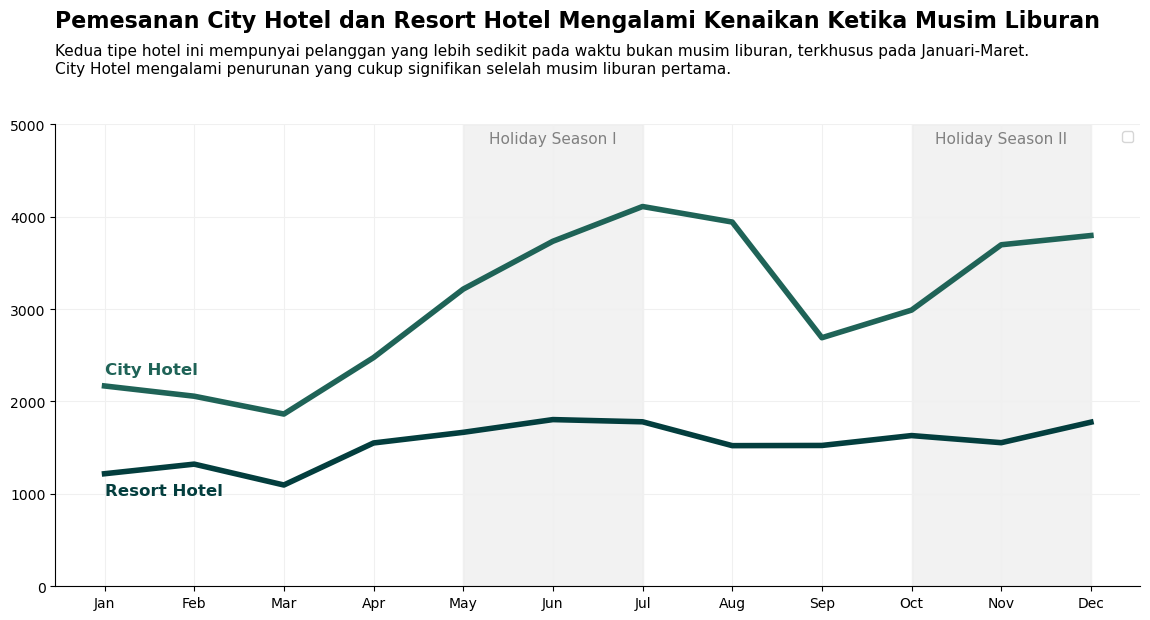

In [31]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. Membuat plot
sns.lineplot(x='month', y='average', hue='hotel', data= monthly_booking, palette=['#1f6357', '#033e3e'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)

# 2. Mengatur label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# 3. Mengatur legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#1f6357', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#033e3e', ha='left', fontweight='bold')

# 4. Menambahkan judul dan deskripsi
plt.title('Pemesanan City Hotel dan Resort Hotel Mengalami Kenaikan Ketika Musim Liburan', fontsize=16, pad=70, loc='left',fontweight='bold')
plt.text(y = 5700, x = -0.55, s = 'Kedua tipe hotel ini mempunyai pelanggan yang lebih sedikit pada waktu bukan musim liburan, terkhusus pada Januari-Maret. \nCity Hotel mengalami penurunan yang cukup signifikan selelah musim liburan pertama.', 
         ha='left', va='center', size=11)

# 5. Set holiday season I
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

# 6. Set holiday season II
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')


Dari grafik diatas, dapat dilihat bahwa:
1. Saat musim liburan, pemesanan hotel cenderung mengalami peningkatan.
2. Pemesanan kedua tipe hotel pada perode bulan **Mei - Agustus** memiliki nilai tertinggi (terutama untuk City Hotel), serta mengalami peningkatan yang signifikan pada periode waktu tersebut.
    - Hal ini dapat dikarenakan pada **2017-2019** pada bulan Mei - Agustus selain **liburan sekolah**, juga bertepatan dengan **banyaknya hari libur nasional** seperti cuti bersama dan even keagamaan seperti ramadhan dan lebaran.<br>
    - Sehingga banyak kesempatan untuk masyarakat menfaatkan waktunya untuk berlibur, berkunjung ke luar kota, dan melakukan pemesanan hotel. Sedangkan pada musim liburan **Oktober - Desember** bertepatan depan dengan natal dan **tahun baru**.
3. Tingkat pemesanan terendah terjadi pada periode Januari - Maret. Hal ini dapat dikarenakan sedikit sekali hari libur nasional, awal tahun ajaran baru bagi pelajar, dan memiliki aktivitas perjalanan bisnis yang tidak sibut karena masih awal tahun.

## B. _Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate_
Analisis ini berfokus untuk melihat tren antara durasi menginap dengan tingkat pembatalan pemesanan hotel.

### 1. _Total Cancelation Rate_

In [32]:
df_city = df_c[df_c['hotel']=='City Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


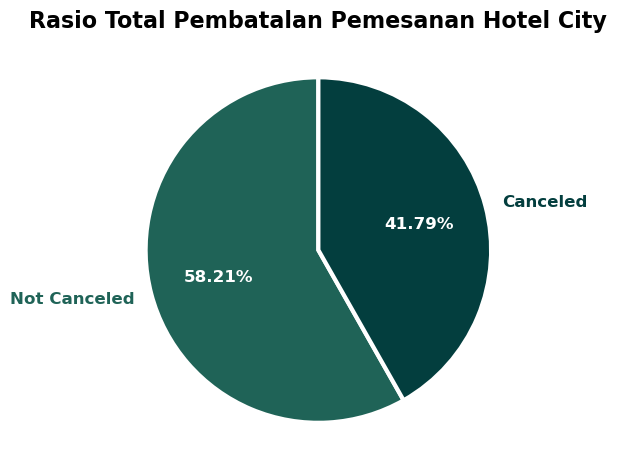

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f6357', '#033e3e'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel City', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [34]:
df_resort = df_c[df_c['hotel']=='Resort Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


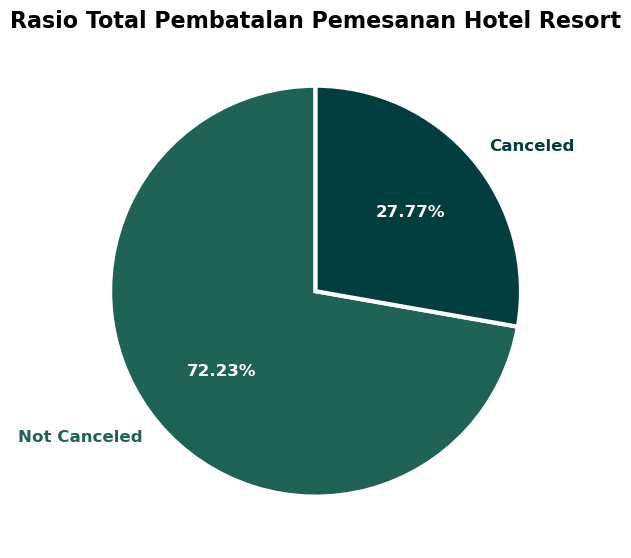

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f6357', '#033e3e'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel Resort', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

Dapat dilihat bahwa City Hotel pun memiliki presentase _cancellation rate_ yang lebih tinggi dibandingkan dengan Resort Hotel. Hal ini menunjukkan bahwa banyak pelanggan yang memesan City Hotel cenderung lebih sering membatalkan pesanannya. City Hotel memiliki lokasi yang lebih terpusat di kota atau daerah perkotaan dan dekat dengan tempat-tempat wisata dan bisnis, dapat diduga banyaknya kegiatan yang harus diatur dan mungkin juga pengaruh faktor lain, banyak pelanggan yang membatalkan pesanan mereka.

### 2. _Stay Duration_
Berapa lama durasi waktu menginap yang dipesan oleh pelanggan dapat dilihat dalam fitur `stays_in_weekdays_nights` dan `stays_in_weekend_nights`

In [36]:
# total stay
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
3248,Resort Hotel,0,57,2017,January,48,26,0,3,1,...,No Deposit,240.0,0.0,0,Personal,36.00,0,1,Check-Out,3
33534,Resort Hotel,0,119,2019,April,7,16,2,8,2,...,No Deposit,40.0,0.0,0,Contract,66.72,0,0,Check-Out,10
93702,City Hotel,0,160,2018,September,31,24,1,0,2,...,No Deposit,9.0,0.0,0,Personal,105.30,0,0,Check-Out,1
63007,City Hotel,1,43,2019,March,4,26,0,1,2,...,No Deposit,9.0,0.0,0,Personal,95.40,0,0,Canceled,1
18471,Resort Hotel,0,0,2017,January,48,23,1,0,1,...,No Deposit,0.0,20.0,0,Family,42.00,0,0,Check-Out,1


Untuk melihat rentang waktu durasi menginap pada dataset, maka dapat dilihat dari distribusi histogramnya

<Axes: xlabel='total_stay_duration', ylabel='Count'>

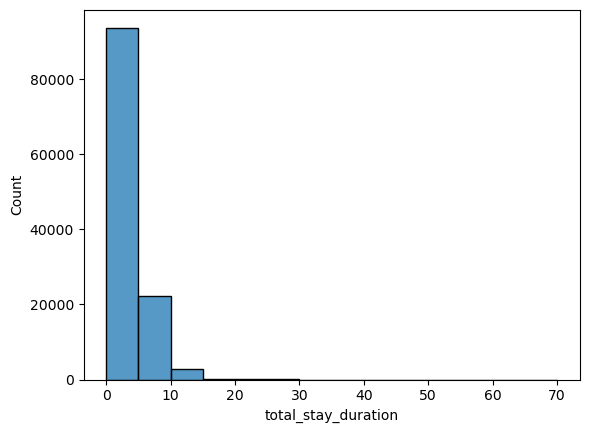

In [37]:
# distribusi total
sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [38]:
unik = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 42
Max durasi: 69
Min durasi: 0


Dari hasil diatas, didapat bahwa total durasi menginap pelanggan memiliki rentang antara 0 hingga 69 hari. Untuk memudahkan interpretasi maka akan dibuat dengan kategori durasi perminggunya sebagai berikut:
- **< 1** : 0 - 7 hari
- **1 - 2** : 8 - 14 hari
- **2 - 3** : 15 - 21 hari
- **2 - 4** : 22 - 28 hari
- **> 4** : > 28 hari

In [39]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3', 
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

In [40]:
df_c['total_stay_week'].value_counts()

total_stay_week
< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: count, dtype: int64

### 3. _Cancelation Rate by Stay Duration_

In [41]:
# Grouping cancel rate based on totel type,duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum',
                                                              'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# Sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


### 4. _Visualization_

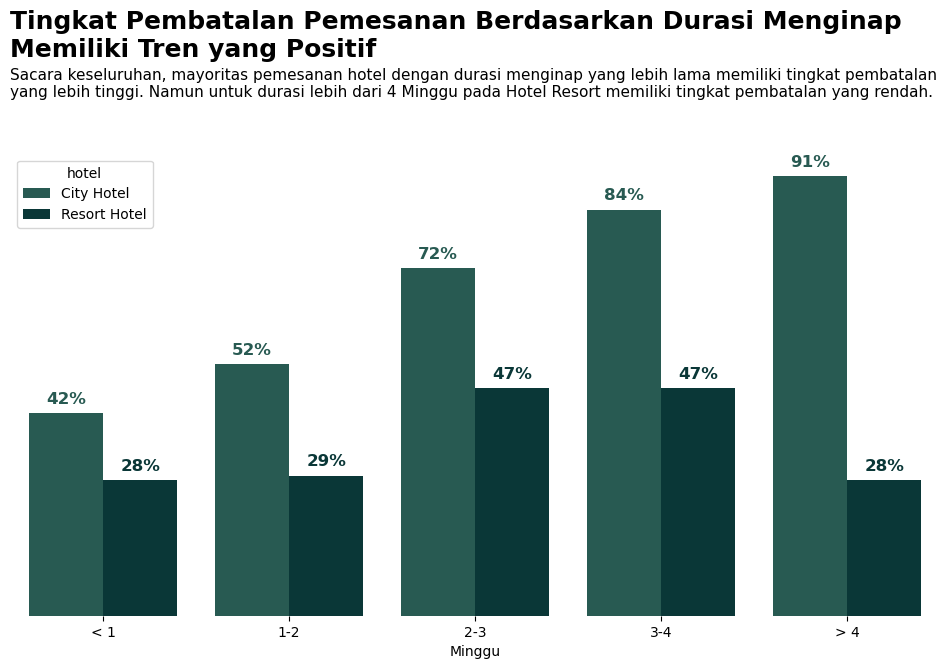

In [42]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f6357', '#033e3e'])

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Minggu')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Berdasarkan Durasi Menginap \nMemiliki Tren yang Positif', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Sacara keseluruhan, mayoritas pemesanan hotel dengan durasi menginap yang lebih lama memiliki tingkat pembatalan \nyang lebih tinggi. Namun untuk durasi lebih dari 4 Minggu pada Hotel Resort memiliki tingkat pembatalan yang rendah.',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

Key Takeaways:
- **Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel**.
- Pada City Hotel untuk durasi menginap lebih dari 2 minggi memiliki Cancelation Rate lebih dari 50%, apalagi untuk durasi menginap lebih dari sebulan hanya 1 dari 10 orang yang tidak membatalkan pesanannya. Cancelation Rate tersebut cukup tinggi sehingga perusahaan harus dapat mennentukan strategi yang tepat untuk dapat memperkecil tingkat pembatalan yang terjadi.

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

Analisis ini berfokus untuk melihat trend Lead time atau masa tunggu (jarak waktu pemesanan hotel hingga waktu kedatangan) dan tingkat pembatalan pemesanan hotel. 


### Duration of Lead Time
---

Untuk melihat rentang waktu masa tunnggu pada dataset, maka dapat dilihat dari distribusi histogramnya

<Axes: xlabel='lead_time', ylabel='Count'>

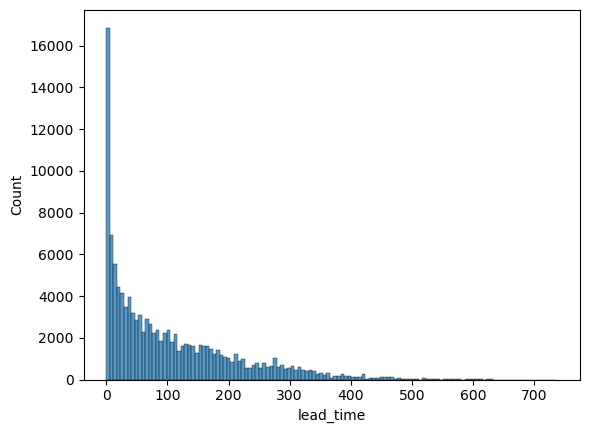

In [43]:
# distribusi lead time
sns.histplot(df_c['lead_time'])

In [44]:
unik = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


Lead time memiliki rentang 0 hingga 709 hari, untuk memudahkan interpretasi maka akan dibuat pengkategorian perbualan.

In [45]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3', 
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7', 
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10', 
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [46]:
# cek kolom
df_c['lead_category'].value_counts()

lead_category
1           38578
2           17462
3           12398
4           10359
5            8237
6            7784
7            5609
8            4180
10           3524
>1 tahun     3405
9            3377
11           2581
12           1709
Name: count, dtype: int64

<br>

### Cancelation Rate by Lead Time
---

In [47]:
# summmary
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


#### **Visualization**

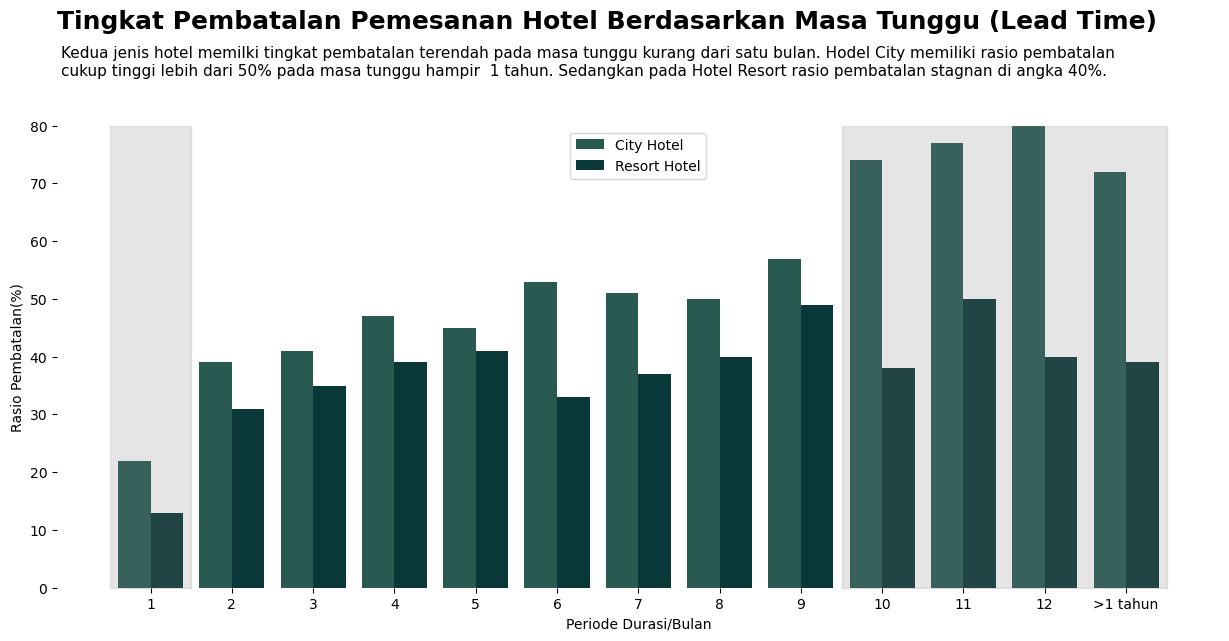

In [48]:
# membuat visualisasi data
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f6357', '#033e3e'])
plt.ylim(0,80)

# -----------------------------------------------------------------------------------------------------------
# mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu (Lead Time)', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Kedua jenis hotel memilki tingkat pembatalan terendah pada masa tunggu kurang dari satu bulan. Hodel City memiliki rasio pembatalan \ncukup tinggi lebih dari 50% pada masa tunggu hampir  1 tahun. Sedangkan pada Hotel Resort rasio pembatalan stagnan di angka 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

Key Takeaways:
- Tingkat pembatalan berdasarkan masa tunggu masih **didominasi oleh City Hotel**, dengan tingkat Cancelation Rate cenderung tinggi ketika masa tunggu hampir satu tahun.
- Dengan melihat Cancelation Rate yang rendah pada masa tunggu sekitar dibawah satu bulan, maka **perusahaan dapat membuat terms pemesanan hotel dengan batasan pemesanan maksimum** guna menghindari peluang pelanggan membatalkan pesanan karena kemungkinan berubah pikiran atau menemukan hotel lain yang lebih diminati.

# **Conclusion**

## Business Questions Answer 

### 1. Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?

Secara keseluruhan City Hotel 66.41% lebih banyak dipesan oleh pelanggan, dengan peningkatan jumlah pelanggan sececara signifikan terjadi pada musim liburan Mei-Juli dan Oktober - Desember. Resort hotel cenderung stagnan dengan peningkatan yang relatif kecil pada musim liburan dibandingkan dengan City Hotel.

### 2. Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel, apalagi City Hotel memiliki tingakat pembetalan lebih dari 70 - 90% pada durasi menginap lebih dari 3 minggu.

### 3. Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?
Tingkat pembatalan akan semakin tinggi seiring dengan masa tunggu pada kedua tipe hotel. Pembatalan terendah ketika masa tunggu dibawah satu bulan.